# Examples with a chain and a Y-shape

In [1]:
import numpy as np
from corsort import *

We study configurations of the following form: a chain of $a$ elements, and a Y-shape with $b$ elements on the "trunk" and $c$ and $d$ elements (respectively) on the "branches". For example:

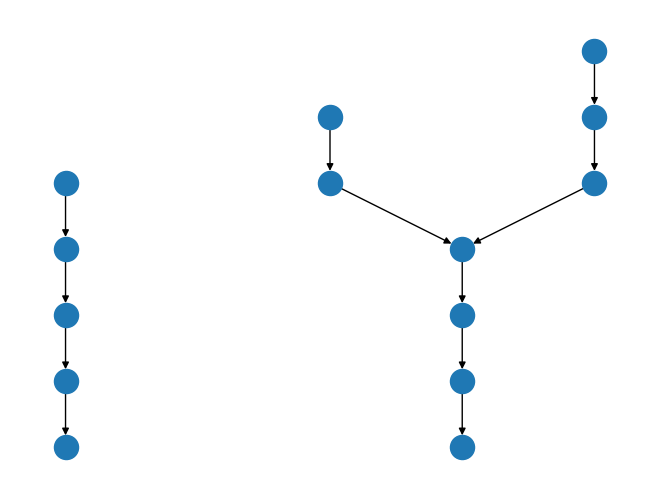

In [2]:
ChainAndY(a=5, b=4, c=2, d=3).draw()

## A simple example

The purpose of this example is to illustrate $\Delta$, $\rho$, the median height and the optimal order (minimizing the expected Spearman distance).

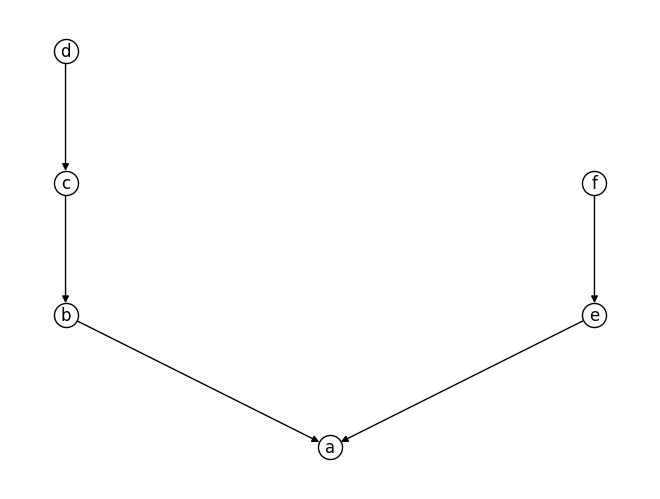

In [3]:
poset = ChainAndY(0, 1, 3, 2)
poset.draw(with_labels=True, alpha_labels=True)

In [4]:
poset.delta

array([-5, -1,  1,  3,  0,  2])

In [5]:
poset.rho

array([Fraction(1, 7), Fraction(2, 5), Fraction(3, 5), Fraction(4, 5),
       Fraction(1, 2), Fraction(3, 4)], dtype=object)

In [6]:
poset.median_height

array([0., 1., 3., 5., 2., 4.])

In [7]:
print_order_as_letters(poset.order_delta)

(abecfd)


In [8]:
print_order_as_letters(poset.order_rho)

(abecfd)


In [9]:
print_order_as_letters(poset.order_median_height)

(abecfd)


In [10]:
print_order_as_letters(poset.order_spearman_optimal)

(abecfd)


## Looking for a more complex example

We are now looking for an example where the estimators $\Delta$, $\rho$ and the median height all yield distinct orderings. We will also impose that there is no tie in these estimators, so that there is no ambiguity when ordering the nodes according to them. A side effect of this decision is that `order_median_height` is optimal, i.e. it is the same as `order_spearman_optimal`.

In [11]:
def is_good_example(a, b, c, d):
    poset = ChainAndY(a, b, c, d)
    n_nodes = poset.n_nodes
    # Non degenerate example
    if min(a, b, c, d) == 0:
        return False
    # rho
    rho = poset.rho
    if len(set(rho)) < n_nodes:  # Tie in rho
        return False
    # delta
    delta = poset.delta
    if len(set(delta)) < n_nodes:  # Tie in delta
        return False
    order_rho = poset.order_rho
    order_delta = poset.order_delta
    if np.array_equal(order_rho, order_delta):  # rho and delta agree
        return False
    # Median height
    median_height = poset.median_height
    if len(set(median_height)) < n_nodes:  # Tie in m
        return False
    order_median_height = poset.order_median_height
    if np.array_equal(order_median_height, order_rho):  # m and rho agree
        return False
    if np.array_equal(order_median_height, order_delta):  # m and delta agree
        return False
    return True

In [12]:
def find_minimal_example():
    n_nodes = 0
    results = []
    found = False
    while not found:
        n_nodes += 1
        print(f"Testing {n_nodes=}...")
        for a in range(n_nodes + 1):
            for b in range(n_nodes - a + 1):
                remains = n_nodes - a - b
                for c in range(remains // 2 + 1):
                    d = n_nodes - a - b - c
                    # print(f"Testing {a=}, {b=}, {c=}, {d=}...")
                    if is_good_example(a, b, c, d):
                        results.append((a, b, c, d))
                        found = True
    return results

In [13]:
results = find_minimal_example()

Testing n_nodes=1...
Testing n_nodes=2...
Testing n_nodes=3...
Testing n_nodes=4...
Testing n_nodes=5...
Testing n_nodes=6...
Testing n_nodes=7...
Testing n_nodes=8...
Testing n_nodes=9...
Testing n_nodes=10...
Testing n_nodes=11...
Testing n_nodes=12...
Testing n_nodes=13...
Testing n_nodes=14...
Testing n_nodes=15...
Testing n_nodes=16...
Testing n_nodes=17...


In [14]:
results

[(2, 12, 1, 2)]

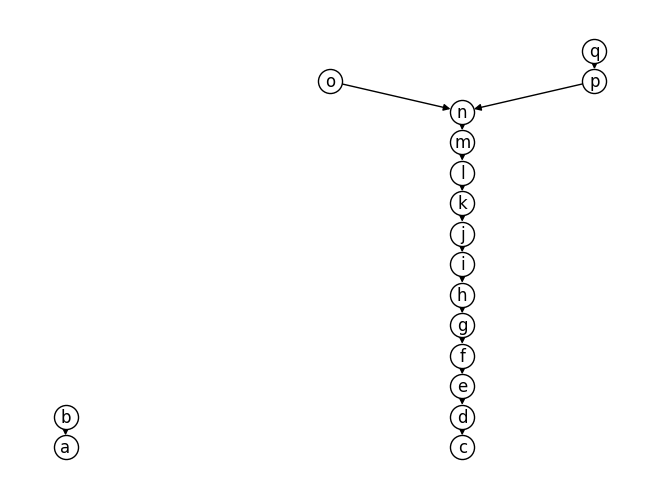

In [15]:
poset = ChainAndY(*results[0])
poset.draw(with_labels=True, alpha_labels=True)

In [16]:
for criterion in ['delta', 'rho', 'median_height', 'spearman_optimal']:
    print(criterion)
    order = getattr(poset, f'order_{criterion}')
    print(order)
    print_order_as_letters(order)
    print(poset.spearman_score(order))
    print()

delta
[ 2  3  4  5  6  7  8  0  9  1 10 11 12 13 15 14 16]
(cdefghiajbklmnpoq)
16.161764705882355

rho
[ 2  3  4  5  6  0  7  8  9 10 11  1 12 13 15 14 16]
(cdefgahijklbmnpoq)
14.044117647058824

median_height
[ 2  3  4  5  0  6  7  8  9 10 11 12  1 13 15 14 16]
(cdefaghijklmbnpoq)
13.926470588235295

spearman_optimal
[ 2  3  4  5  0  6  7  8  9 10 11 12  1 13 15 14 16]
(cdefaghijklmbnpoq)
13.926470588235295



In [17]:
poset.delta

array([ -1,   1, -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,
         8,  12,  11,  13])

In [18]:
poset.rho

array([Fraction(1, 3), Fraction(2, 3), Fraction(1, 16), Fraction(1, 8),
       Fraction(3, 16), Fraction(1, 4), Fraction(5, 16), Fraction(3, 8),
       Fraction(7, 16), Fraction(1, 2), Fraction(9, 16), Fraction(5, 8),
       Fraction(11, 16), Fraction(3, 4), Fraction(13, 14),
       Fraction(13, 15), Fraction(14, 15)], dtype=object)

In [19]:
poset.median_height

array([ 4., 12.,  0.,  1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       13., 15., 14., 16.])